In [21]:
# Hassan Ali

# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [23]:
# Loading dataset from a text file, specifying the separator and column names
df = pd.read_csv("seeds_dataset.txt", sep='\\t', engine='python')
df.columns = ['a', 'p', 'compactness', 'length', 'width', 'coeff', 'length_g', 'type']
print(df.head)

<bound method NDFrame.head of          a      p  compactness  length  width  coeff  length_g  type
0    14.88  14.57       0.8811   5.554  3.333  1.018     4.956     1
1    14.29  14.09       0.9050   5.291  3.337  2.699     4.825     1
2    13.84  13.94       0.8955   5.324  3.379  2.259     4.805     1
3    16.14  14.99       0.9034   5.658  3.562  1.355     5.175     1
4    14.38  14.21       0.8951   5.386  3.312  2.462     4.956     1
..     ...    ...          ...     ...    ...    ...       ...   ...
204  12.19  13.20       0.8783   5.137  2.981  3.631     4.870     3
205  11.23  12.88       0.8511   5.140  2.795  4.325     5.003     3
206  13.20  13.66       0.8883   5.236  3.232  8.315     5.056     3
207  11.84  13.21       0.8521   5.175  2.836  3.598     5.044     3
208  12.30  13.34       0.8684   5.243  2.974  5.637     5.063     3

[209 rows x 8 columns]>


In [25]:
# Spliting dataset into training and testing sets, 70:30
# Dropping type as feature
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['type']), df['type'], test_size=.3)

In [27]:
# Initializing KNN classifier with 3 neighbors & fitting to the training data
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [29]:
# Predicting labels for the test set
prediction = classifier.predict(X_test)

In [31]:
# Calculating number of correct predictions and accuracy of the classifier
correct = np.where(prediction==y_test, 1, 0).sum()
accuracy = correct / len(y_test)
print("Correct Predicitons=", correct, "Accuracy=", accuracy)

Correct Predicitons= 60 Accuracy= 0.9523809523809523


In [33]:
# Initializing an empty list to store the results of different k values
results = []

In [35]:
# Looping over k values from 1 to 50, stepping by 2, to find the best performing k
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = np.where(prediction==y_test, 1, 0).sum() / len(y_test)
    print("k=", k, " Accuracy=", accuracy)
    results.append([k, accuracy])  # Appending the k and its corresponding accuracy to the results list

k= 1  Accuracy= 0.9206349206349206
k= 3  Accuracy= 0.9047619047619048
k= 5  Accuracy= 0.9365079365079365
k= 7  Accuracy= 0.9682539682539683
k= 9  Accuracy= 0.9523809523809523
k= 11  Accuracy= 0.9365079365079365
k= 13  Accuracy= 0.9365079365079365
k= 15  Accuracy= 0.9523809523809523
k= 17  Accuracy= 0.9523809523809523
k= 19  Accuracy= 0.9523809523809523
k= 21  Accuracy= 0.9365079365079365
k= 23  Accuracy= 0.9682539682539683
k= 25  Accuracy= 0.9523809523809523
k= 27  Accuracy= 0.9523809523809523
k= 29  Accuracy= 0.9682539682539683
k= 31  Accuracy= 0.9206349206349206
k= 33  Accuracy= 0.9206349206349206
k= 35  Accuracy= 0.9206349206349206
k= 37  Accuracy= 0.9365079365079365
k= 39  Accuracy= 0.9365079365079365
k= 41  Accuracy= 0.9206349206349206
k= 43  Accuracy= 0.9365079365079365
k= 45  Accuracy= 0.9206349206349206
k= 47  Accuracy= 0.9206349206349206
k= 49  Accuracy= 0.9206349206349206


In [36]:
# Converting the list of results into a DataFrame for easy plotting
results = pd.DataFrame(results, columns=["k", "accuracy"])

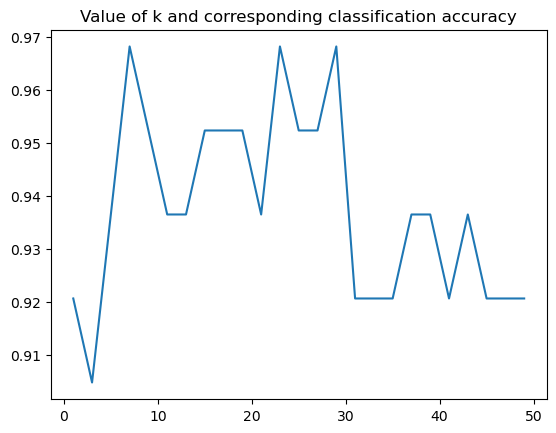

In [39]:
# Plotting the accuracy of the classifier as a function of k
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()